In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For consistent plots
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("/Users/apple/Desktop/FraudAnamolyDetection/data/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Check class imbalance 
df['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

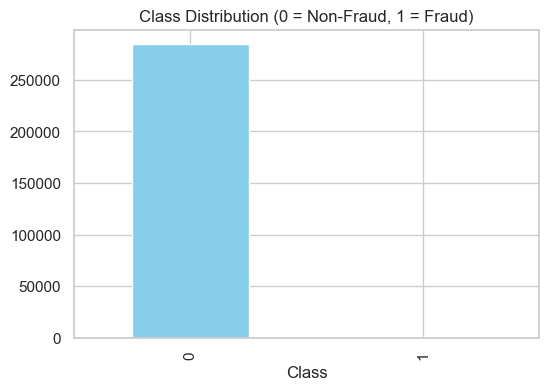

In [5]:
#Visulaize the class imbalance
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

In [6]:
#Feature stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#Check Correlation with fraud
corr = df.corr()['Class'].sort_values(ascending=False)
corr.head(10)

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129,
        -0.36457179,  1.35145359,  0.63977564,  0

In [9]:
# Convert features to 2 dimension for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Class': y
})

pca_df.head()

,PC1,PC2,Class
0,0.418176,-2.524519,0
1,-0.389864,-2.087098,0
2,1.878773,-2.538205,0
3,0.319404,-1.774928,0
4,0.005063,-1.525473,0


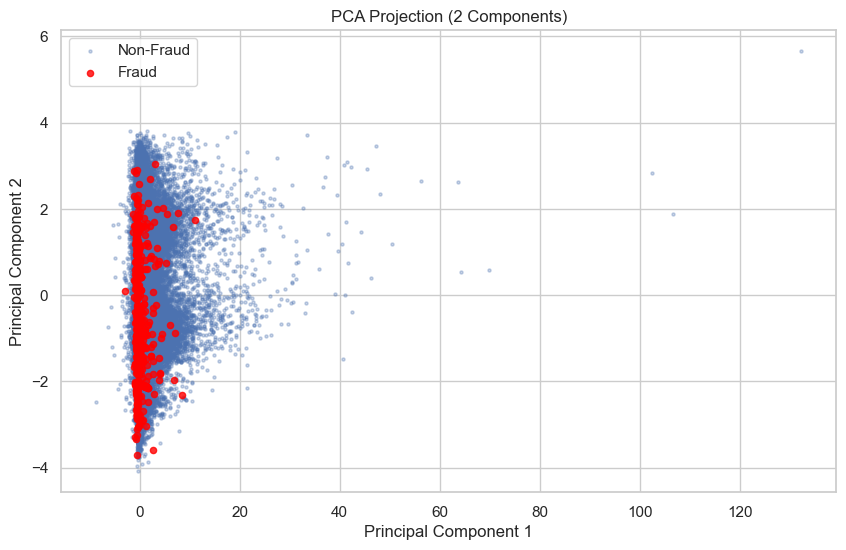

In [10]:
#PCA Plot
plt.figure(figsize=(10,6))

# Non-fraud in blue
plt.scatter(
    pca_df[pca_df['Class']==0]['PC1'], 
    pca_df[pca_df['Class']==0]['PC2'],
    s=5, alpha=0.3, label="Non-Fraud"
)

# Fraud in red
plt.scatter(
    pca_df[pca_df['Class']==1]['PC1'], 
    pca_df[pca_df['Class']==1]['PC2'],
    s=20, alpha=0.8, label="Fraud", color='red'
)

plt.title("PCA Projection (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [11]:
#Apply non-linear clustering visualization using t-SNE
from sklearn.manifold import TSNE

# Sample the dataset
sample_df = df.sample(10000, random_state=42)
X_sample = sample_df.drop(columns=['Class'])
y_sample = sample_df['Class']

# Scale again
X_sample_scaled = scaler.fit_transform(X_sample)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample_scaled)

tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:,0],
    'TSNE2': X_tsne[:,1],
    'Class': y_sample
})

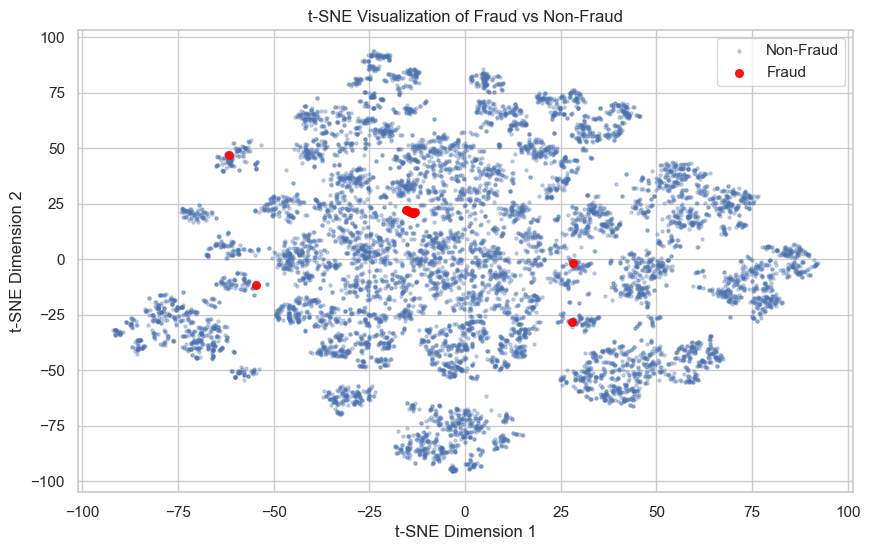

In [12]:
#Plot t-SNE
plt.figure(figsize=(10,6))

plt.scatter(
    tsne_df[tsne_df['Class']==0]['TSNE1'],
    tsne_df[tsne_df['Class']==0]['TSNE2'],
    s=5, alpha=0.3, label='Non-Fraud'
)

plt.scatter(
    tsne_df[tsne_df['Class']==1]['TSNE1'],
    tsne_df[tsne_df['Class']==1]['TSNE2'],
    s=30, alpha=0.9, label='Fraud', color='red'
)

plt.title("t-SNE Visualization of Fraud vs Non-Fraud")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

In [13]:
#Class Weighting Implementation
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)

class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

In [14]:
#APPLYING CLASS WEIGHTS TO LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

logreg = LogisticRegression(class_weight=class_weights_dict, max_iter=500)
logreg.fit(X_train, y_train)

preds = logreg.predict(X_test)
print(classification_report(y_test, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0609    0.9184    0.1142        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5509     56962
weighted avg     0.9982    0.9755    0.9861     56962



In [15]:
#APPLYING CLASS WEIGHTS TO RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight=class_weights_dict,
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

print(classification_report(y_test, preds_rf, digits=4))

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9487    0.7551    0.8409        98

    accuracy                         0.9995     56962
   macro avg     0.9741    0.8775    0.9203     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [16]:
pip install xgboost==1.7.3

Note: you may need to restart the kernel to use updated packages.


In [17]:
#APPLYING CLASS WEIGHTS TO XGBOOST
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=class_weights_dict[1],   # built-in class weight handling
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)
preds_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, preds_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     56864
           1     0.8400    0.8571    0.8485        98

    accuracy                         0.9995     56962
   macro avg     0.9199    0.9284    0.9241     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [18]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
#Advanced imbalance handling using SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ApplyING SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [20]:
#Train XGBoost on SMOTE Data
xgb_model_smote = xgb.XGBClassifier(
    scale_pos_weight=1,  
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model_smote.fit(X_train_smote, y_train_smote)
preds_smote = xgb_model_smote.predict(X_test)

print(classification_report(y_test, preds_smote, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9975    0.9986     56864
           1     0.3755    0.8776    0.5260        98

    accuracy                         0.9973     56962
   macro avg     0.6877    0.9375    0.7623     56962
weighted avg     0.9987    0.9973    0.9978     56962



In [21]:
#Apply SMOTE and ENN(Edited Nearest Neighbours)
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_enn, y_train_enn = smote_enn.fit_resample(X_train, y_train)

print("After SMOTE-ENN:", y_train_enn.value_counts())

After SMOTE-ENN: Class
1    227451
0    227055
Name: count, dtype: int64


In [22]:
#Training XGBOOST on SMOTE-ENN DATA
xgb_model_enn = xgb.XGBClassifier(
    scale_pos_weight=1,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model_enn.fit(X_train_enn, y_train_enn)
preds_enn = xgb_model_enn.predict(X_test)

print(classification_report(y_test, preds_enn, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9972    0.9985     56864
           1     0.3484    0.8673    0.4971        98

    accuracy                         0.9970     56962
   macro avg     0.6741    0.9323    0.7478     56962
weighted avg     0.9987    0.9970    0.9976     56962



In [23]:
#Simple Autoencoder(Baseline Model)
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Separate normal samples 
X_normal = X_tensor[y_tensor == 0]

train_ae = X_normal

train_loader_ae = DataLoader(train_ae, batch_size=256, shuffle=True)
train_loader_ae

In [24]:
#Model Architecture
class SimpleAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(SimpleAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [25]:
#Model Initialisation
input_dim = X_scaled.shape[1]
model_ae = SimpleAutoencoder(input_dim)

#Loss function & Optimiser
criterion = nn.MSELoss()     
optimizer = torch.optim.Adam(model_ae.parameters(), lr=0.001)

In [26]:
#Model Training
num_epochs = 20  
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    
    for batch in train_loader_ae:
        optimizer.zero_grad()
        
        reconstructed = model_ae(batch)
        loss = criterion(reconstructed, batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

Epoch [1/20] Loss: 748.8691
Epoch [2/20] Loss: 605.3409
Epoch [3/20] Loss: 558.2510
Epoch [4/20] Loss: 530.5537
Epoch [5/20] Loss: 515.8371
Epoch [6/20] Loss: 506.8807
Epoch [7/20] Loss: 500.9456
Epoch [8/20] Loss: 496.5782
Epoch [9/20] Loss: 493.2081
Epoch [10/20] Loss: 490.2045
Epoch [11/20] Loss: 487.8160
Epoch [12/20] Loss: 485.7230
Epoch [13/20] Loss: 484.2582
Epoch [14/20] Loss: 483.0989
Epoch [15/20] Loss: 482.2351
Epoch [16/20] Loss: 481.3667
Epoch [17/20] Loss: 479.8061
Epoch [18/20] Loss: 478.0839
Epoch [19/20] Loss: 474.4873
Epoch [20/20] Loss: 469.9923


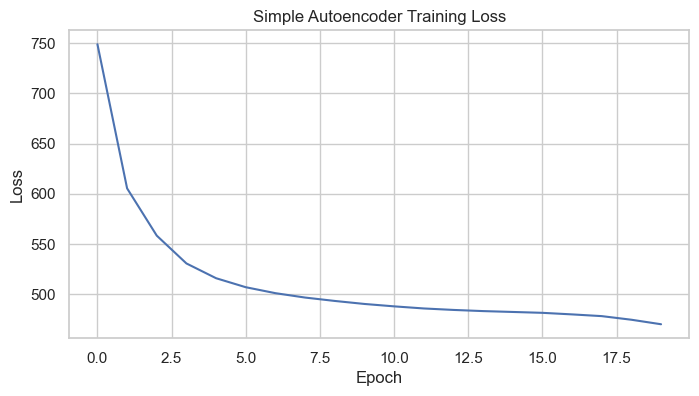

In [27]:
#Training Loss Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(losses)
plt.title("Simple Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [28]:
#Reconstruction Error (RE)
model_ae.eval()

with torch.no_grad():
    reconstructed = model_ae(X_tensor)
    reconstruction_error = torch.mean((reconstructed - X_tensor)**2, dim=1).numpy()

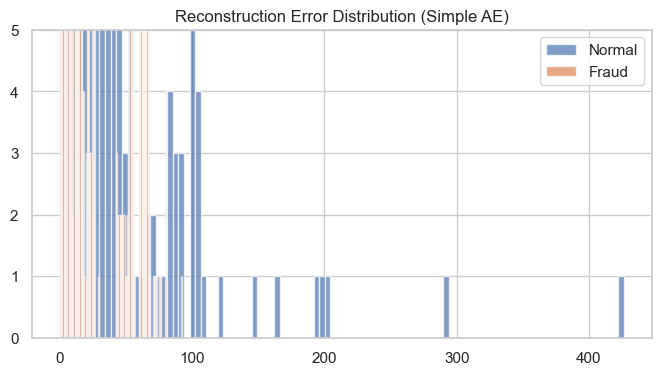

In [96]:
#Histogram for RE Analysis
plt.figure(figsize=(8,4))
plt.hist(reconstruction_error[y==0], bins=100, alpha=0.7, label="Normal")
plt.hist(reconstruction_error[y==1], bins=100, alpha=0.7, label="Fraud")
plt.legend()
plt.ylim(0,5)
plt.title("Reconstruction Error Distribution (Simple AE)")
plt.show()

In [30]:
#Deep AutoEncoder
class DeepAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(DeepAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),   # bottleneck
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [31]:
#Model Initialisation
model_deep = DeepAutoencoder(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_deep.parameters(), lr=0.001)

In [32]:
#Model Training
num_epochs = 30
losses_deep = []

for epoch in range(num_epochs):
    epoch_loss = 0
    
    for batch in train_loader_ae:
        optimizer.zero_grad()
        
        reconstructed = model_deep(batch)
        loss = criterion(reconstructed, batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    losses_deep.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

Epoch [1/30] Loss: 667.2598
Epoch [2/30] Loss: 428.1411
Epoch [3/30] Loss: 375.2573
Epoch [4/30] Loss: 340.9619
Epoch [5/30] Loss: 321.2736
Epoch [6/30] Loss: 293.2717
Epoch [7/30] Loss: 249.7387
Epoch [8/30] Loss: 217.3835
Epoch [9/30] Loss: 203.4213
Epoch [10/30] Loss: 191.5512
Epoch [11/30] Loss: 184.5975
Epoch [12/30] Loss: 178.2413
Epoch [13/30] Loss: 171.7187
Epoch [14/30] Loss: 169.7987
Epoch [15/30] Loss: 163.4776
Epoch [16/30] Loss: 161.2285
Epoch [17/30] Loss: 158.9799
Epoch [18/30] Loss: 157.0820
Epoch [19/30] Loss: 154.7730
Epoch [20/30] Loss: 152.6235
Epoch [21/30] Loss: 151.7834
Epoch [22/30] Loss: 148.2212
Epoch [23/30] Loss: 147.4284
Epoch [24/30] Loss: 147.5897
Epoch [25/30] Loss: 145.4392
Epoch [26/30] Loss: 142.7001
Epoch [27/30] Loss: 142.5243
Epoch [28/30] Loss: 141.7881
Epoch [29/30] Loss: 140.3770
Epoch [30/30] Loss: 139.9575


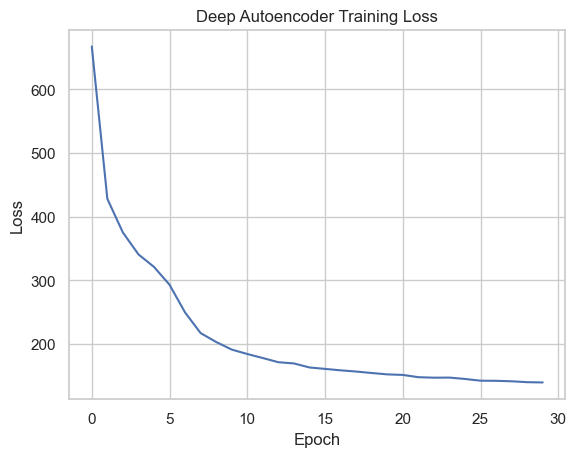

In [33]:
plt.plot(losses_deep)
plt.title("Deep Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [34]:
model_deep.eval()
with torch.no_grad():
    reconstructed_deep = model_deep(X_tensor)
    reconstruction_error_deep = torch.mean((reconstructed_deep - X_tensor)**2, dim=1).numpy()

In [35]:
print(reconstruction_error_deep)

[0.11369066 0.05209917 0.28125662 ... 0.07993443 0.07411049 0.05613264]


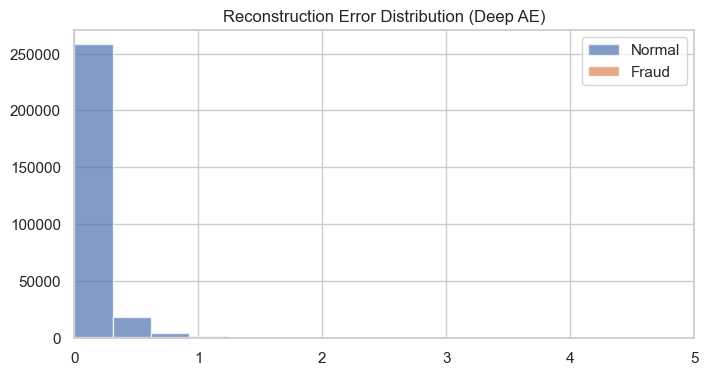

In [84]:
plt.figure(figsize=(8,4))
plt.hist(reconstruction_error_deep[y==0], bins=100, alpha=0.7, label="Normal")
plt.hist(reconstruction_error_deep[y==1], bins=100, alpha=0.7, label="Fraud")
plt.xlim(0,5)
plt.legend()
plt.title("Reconstruction Error Distribution (Deep AE)")
plt.show()

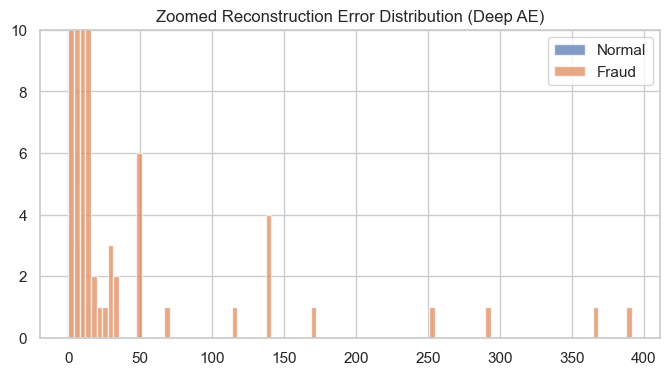

In [37]:
plt.figure(figsize=(8,4))
plt.hist(reconstruction_error_deep[y==0], bins=100, alpha=0.7, label="Normal")
plt.hist(reconstruction_error_deep[y==1], bins=100, alpha=0.7, label="Fraud")
plt.ylim(0,10)
plt.legend()
plt.title("Zoomed Reconstruction Error Distribution (Deep AE)")
plt.show()

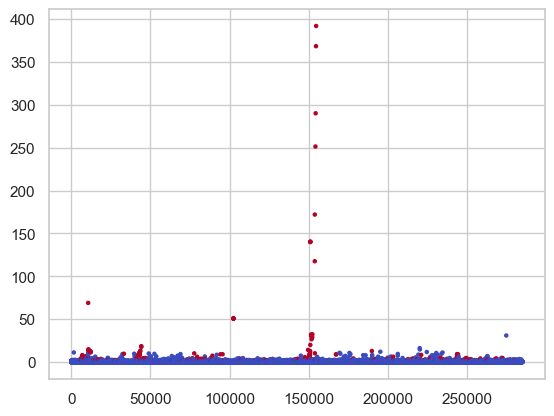

In [38]:
plt.scatter(range(len(reconstruction_error_deep)), reconstruction_error_deep, c=y, cmap='coolwarm', s=5)
plt.show()

In [39]:
#Compute ROC Curve 
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, reconstruction_error_deep)

# Youden’s J statistic = best tradeoff
j_scores = tpr - fpr
best_idx = j_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)

Best Threshold: 0.6124683


In [40]:
#Prediction using Threshold
y_pred_ae = (reconstruction_error_deep >= best_threshold).astype(int)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_ae, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9702    0.9848    284315
           1     0.0464    0.8374    0.0880       492

    accuracy                         0.9700    284807
   macro avg     0.5231    0.9038    0.5364    284807
weighted avg     0.9981    0.9700    0.9832    284807



AE ROC-AUC: 0.944767326232255


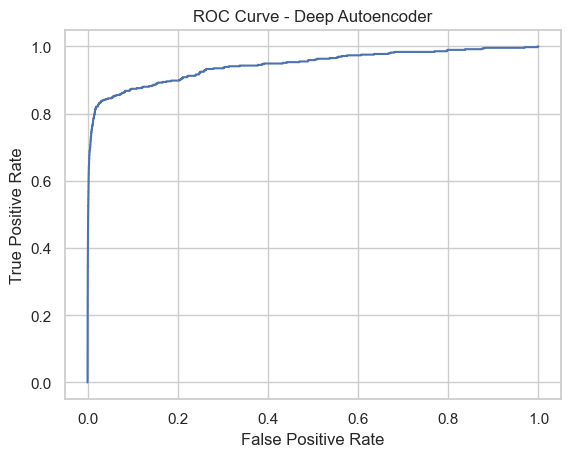

In [42]:
#ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y, reconstruction_error_deep)
print("AE ROC-AUC:", auc)

fpr, tpr, _ = roc_curve(y, reconstruction_error_deep)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deep Autoencoder")
plt.show()


Average Precision (AP): 0.40064278673229203


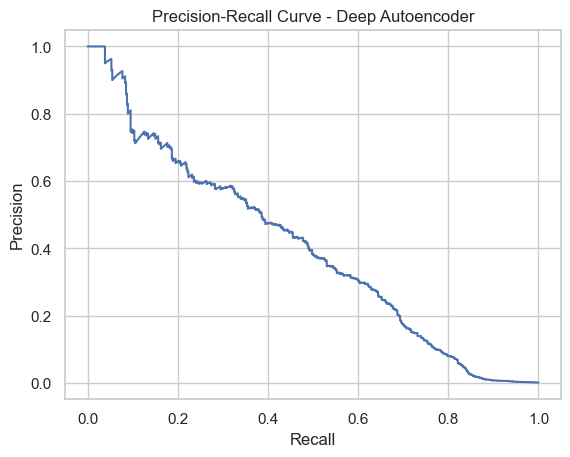

In [43]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y, reconstruction_error_deep)
ap = average_precision_score(y, reconstruction_error_deep)

print("Average Precision (AP):", ap)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Deep Autoencoder")
plt.show()

In [45]:
#ERROR ANALYSIS

# Convert to numpy 
y_true = np.array(y)
y_pred = np.array(y_pred_ae)
errors = np.array(reconstruction_error_deep)

results_df = pd.DataFrame({
    "TrueLabel": y_true,
    "PredLabel": y_pred,
    "Error": errors
})

FP = results_df[(results_df.TrueLabel == 0) & (results_df.PredLabel == 1)]
FN = results_df[(results_df.TrueLabel == 1) & (results_df.PredLabel == 0)]
TP = results_df[(results_df.TrueLabel == 1) & (results_df.PredLabel == 1)]
TN = results_df[(results_df.TrueLabel == 0) & (results_df.PredLabel == 0)]

print("Counts:")
print("True Positives:", len(TP))
print("False Positives:", len(FP))
print("False Negatives:", len(FN))
print("True Negatives:", len(TN))

Counts:
True Positives: 412
False Positives: 8463
False Negatives: 80
True Negatives: 275852


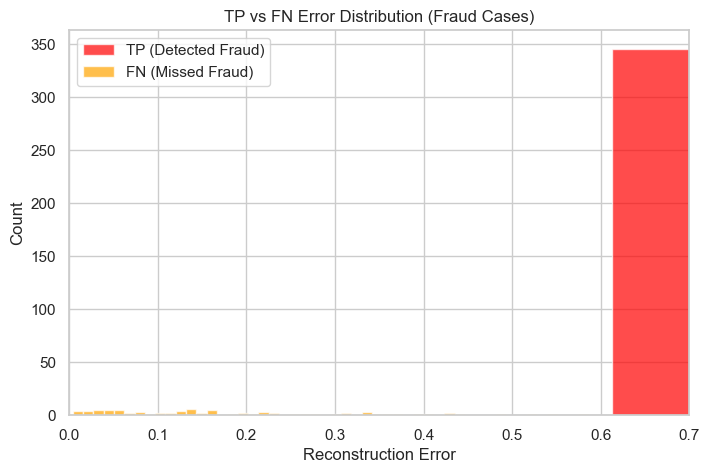

In [52]:
#FN vs TP reconstruction error distributions
plt.figure(figsize=(8,5))
plt.hist(TP["Error"], bins=50, alpha=0.7, label="TP (Detected Fraud)", color="red")
plt.hist(FN["Error"], bins=50, alpha=0.7, label="FN (Missed Fraud)", color="orange")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.xlim(0,0.7)
plt.title("TP vs FN Error Distribution (Fraud Cases)")
plt.legend()
plt.show()

In [47]:
print("TP Error Mean:", TP["Error"].mean())
print("FN Error Mean:", FN["Error"].mean())
print("TP Error Min:", TP["Error"].min())
print("FN Error Min:", FN["Error"].min())
print("TP Error Max:", TP["Error"].max())
print("FN Error Max:", FN["Error"].max())

TP Error Mean: 10.102904
FN Error Mean: 0.17610756
TP Error Min: 0.6124683022499084
FN Error Min: 0.0037423816975206137
TP Error Max: 391.8355407714844
FN Error Max: 0.5865291357040405


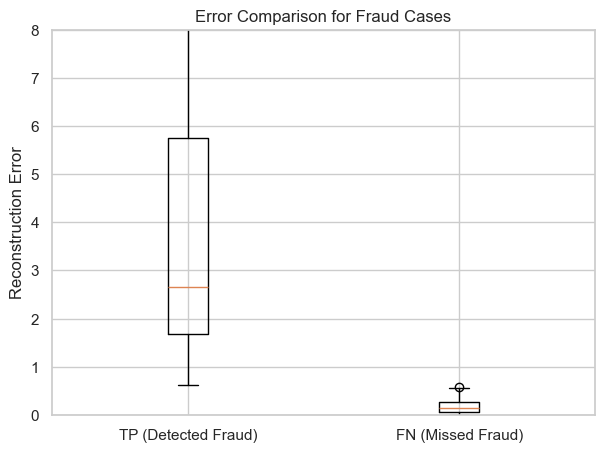

In [48]:
plt.figure(figsize=(7,5))
plt.boxplot([TP["Error"], FN["Error"]], labels=["TP (Detected Fraud)", "FN (Missed Fraud)"])
plt.ylabel("Reconstruction Error")
plt.title("Error Comparison for Fraud Cases")
plt.ylim(0,8)
plt.show()

In [98]:
#Saving the models
import joblib
joblib.dump(logreg, "/Users/apple/Desktop/FraudAnamolyDetection/models/log_reg_model.pkl")
joblib.dump(rf, "/Users/apple/Desktop/FraudAnamolyDetection/models/rf_model.pkl")
joblib.dump(xgb_model, "/Users/apple/Desktop/FraudAnamolyDetection/models/xgb_model.pkl")

['/Users/apple/Desktop/FraudAnamolyDetection/models/deep_autoencoder_model.pth']

In [100]:
torch.save(model_ae.state_dict(), "/Users/apple/Desktop/FraudAnamolyDetection/models/autoencoder_model.pth")
torch.save(model_deep.state_dict(), "/Users/apple/Desktop/FraudAnamolyDetection/models/deep_autoencoder_model.pth")

In [104]:
pip install "numpy<2" --force-reinstall

  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [106]:
import json

with open("FraudDetectionAnomaly.ipynb", "r") as f:
    nb = json.load(f)

for i, cell in enumerate(nb["cells"]):
    if cell["cell_type"] == "code":
        print(f"\n\n# ========= Cell {i} =========\n")
        print("".join(cell["source"]))



# ========= Cell 0 =========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For consistent plots
sns.set(style="whitegrid")


# ========= Cell 1 =========

df = pd.read_csv("/Users/apple/Desktop/FraudAnamolyDetection/data/creditcard.csv")
print(df.shape)
df.head()


# ========= Cell 2 =========

df.info()


# ========= Cell 3 =========

#Check class imbalance 
df['Class'].value_counts(normalize=True) * 100


# ========= Cell 4 =========

#Visulaize the class imbalance
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


# ========= Cell 5 =========

#Feature stats
df.describe().T


# ========= Cell 6 =========

#Check Correlation with fraud
corr = df.corr()['Class'].sort_values(ascending=False)
corr.head(10)


# ========= Cell 7 =========

#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Separate fe